In [79]:
# Decision Tree Classifier
# o	A tree-based model that will learn splits on the specification features to classify into the price-range classes.
# o	This allows you to investigate feature importance, interpretability, and the structure of the decision process.


## Step 1 Read the dataset

In [80]:
from warnings import filterwarnings
filterwarnings('ignore')

In [81]:
import pandas as pd
path = r'train.csv'
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [82]:

df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

## Step2: Perform basic data quality checks

In [83]:
df.shape

(2000, 21)

In [84]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [86]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [87]:
df.duplicated().sum()

0

In [88]:
#not now but come in future 
df.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Step3: Separate data into X and Y features
Y = to predicate price range 

In [89]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [90]:
x = df.drop(columns=['price_range'])
y = df[['price_range']]

In [91]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [92]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Step4 : Data Preprocessing and Data cleaning

In [93]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [94]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [95]:
print(cat,con,sep='\n')

[]
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [96]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [97]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

In [98]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [99]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 []),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['battery_power', 'blue', 'clock_speed',
                                  'dual_sim', 'fc', 'four_g', 'int_memory',
                                  'm_dep', 'mobile_wt', 'n_cores', 'pc',
                                  'px_height', 'px_width', 'ram', 'sc_h',
                                  'sc_w', 'talk_time', 'three_g',
                                  'touch_screen', 'wifi'])])

In [100]:

X_pre = pre.fit_transform(x)
X_pre.head()

,con__battery_power,con__blue,con__clock_speed,con__dual_sim,con__fc,con__four_g,con__int_memory,con__m_dep,con__mobile_wt,con__n_cores,con__pc,con__px_height,con__px_width,con__ram,con__sc_h,con__sc_w,con__talk_time,con__three_g,con__touch_screen,con__wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Step5: Split the data into training and testing

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,y,train_size=0.75,random_state=21)

In [103]:
xtrain.head()

,con__battery_power,con__blue,con__clock_speed,con__dual_sim,con__fc,con__four_g,con__int_memory,con__m_dep,con__mobile_wt,con__n_cores,con__pc,con__px_height,con__px_width,con__ram,con__sc_h,con__sc_w,con__talk_time,con__three_g,con__touch_screen,con__wifi
1527,1.362327,-0.990050,-0.640169,0.981177,0.159088,0.957886,-1.105027,1.381165,-1.052505,1.521249,-0.645989,1.746551,0.665333,0.156564,-1.022389,0.283103,1.645557,0.559641,-1.006018,0.986097
1353,0.449528,-0.990050,1.198517,0.981177,-0.992890,0.957886,0.548669,1.381165,-0.459131,1.521249,-1.470690,2.661646,1.352687,0.564139,-0.072765,-0.176107,1.462493,0.559641,0.994018,-1.014099
659,-0.620335,1.010051,-1.130485,-1.019184,1.080671,0.957886,0.989655,-1.046495,-0.656922,-0.227564,0.013773,1.805153,1.162913,0.414756,-0.547577,-1.094526,-1.100394,0.559641,-1.006018,0.986097
469,1.380537,1.010051,-1.253064,0.981177,1.311067,-1.043966,1.596010,-0.699686,-1.250297,-1.539175,0.343653,-0.795880,-1.287958,-0.362588,-0.784983,-0.176107,-0.917331,-1.786861,-1.006018,-1.014099
374,0.217345,1.010051,1.075937,-1.019184,0.159088,0.957886,0.548669,0.340740,-0.713434,0.209639,0.673534,1.221386,1.672064,0.385249,-0.547577,-1.094526,-0.551204,0.559641,-1.006018,-1.014099


In [104]:
ytrain.head()

,price_range
1527,3
1353,3
659,2
469,1
374,3


In [105]:
xtest.head()

,con__battery_power,con__blue,con__clock_speed,con__dual_sim,con__fc,con__four_g,con__int_memory,con__m_dep,con__mobile_wt,con__n_cores,con__pc,con__px_height,con__px_width,con__ram,con__sc_h,con__sc_w,con__talk_time,con__three_g,con__touch_screen,con__wifi
541,-1.014136,-0.990050,-0.395011,0.981177,-0.762495,0.957886,0.328176,0.340740,1.010178,-0.227564,-0.481048,1.309289,1.304086,0.935753,-1.497202,-1.094526,0.181050,0.559641,0.994018,0.986097
1211,-1.196241,1.010051,0.095305,-1.019184,0.619880,0.957886,-1.656260,-0.352878,1.151457,1.521249,-0.151168,1.275480,0.292726,-1.511547,-0.547577,0.053498,-1.283457,0.559641,0.994018,0.986097
1862,-0.445060,-0.990050,1.443675,-1.019184,-0.301703,-1.043966,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,0.559641,-1.006018,-1.014099
1094,-1.253148,1.010051,-0.027274,-1.019184,-0.992890,-1.043966,-1.656260,1.727974,-1.448088,-0.664768,-1.305750,-0.843213,-0.885265,-1.598226,-1.734608,-0.864922,-0.551204,0.559641,0.994018,0.986097
465,0.784145,1.010051,0.095305,-1.019184,0.159088,0.957886,0.548669,1.034357,-0.628666,-0.664768,0.013773,-0.834197,-0.901466,1.408799,0.402047,0.971917,-0.368140,0.559641,-1.006018,-1.014099


In [106]:
ytest.head()

,price_range
541,3
1211,0
1862,0
1094,0
465,3


## Step6: Build the Decision Tree model

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=3,
    criterion='gini'
)

In [109]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)

In [110]:

dtc.score(xtrain,ytrain)

0.8766666666666667

In [111]:

dtc.score(xtest,ytest)

0.822

## Step7: Hyperparameter tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'criterion':['gini','entropy']
}


In [114]:

base_model = DecisionTreeClassifier()

In [115]:
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=4,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [116]:

gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [117]:
gscv.best_score_

0.8417082357572151

In [118]:
gscv.score(xtrain,ytrain)

0.9993377065171434

In [119]:

gscv.score(xtest,ytest)

0.8640006131365786

In [120]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=10)

## Step8: Evaluation Metrics

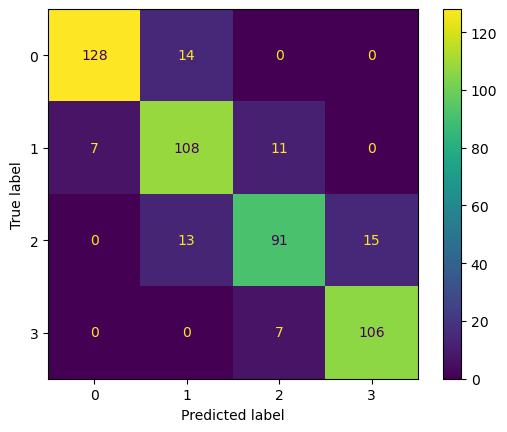

In [121]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

In [122]:
from sklearn.metrics import classification_report
ypred_test = best_dtc.predict(xtest)
ypred_test[:5]

array([3, 0, 0, 0, 3], dtype=int64)

In [123]:

print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       142
           1       0.80      0.86      0.83       126
           2       0.83      0.76      0.80       119
           3       0.88      0.94      0.91       113

    accuracy                           0.87       500
   macro avg       0.86      0.87      0.86       500
weighted avg       0.87      0.87      0.87       500



## Step9: Plot the decision tree

In [124]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [125]:

xtrain.columns

Index(['con__battery_power', 'con__blue', 'con__clock_speed', 'con__dual_sim',
       'con__fc', 'con__four_g', 'con__int_memory', 'con__m_dep',
       'con__mobile_wt', 'con__n_cores', 'con__pc', 'con__px_height',
       'con__px_width', 'con__ram', 'con__sc_h', 'con__sc_w', 'con__talk_time',
       'con__three_g', 'con__touch_screen', 'con__wifi'],
      dtype='object')

In [126]:
fea_names = xtrain.columns
fea_names

Index(['con__battery_power', 'con__blue', 'con__clock_speed', 'con__dual_sim',
       'con__fc', 'con__four_g', 'con__int_memory', 'con__m_dep',
       'con__mobile_wt', 'con__n_cores', 'con__pc', 'con__px_height',
       'con__px_width', 'con__ram', 'con__sc_h', 'con__sc_w', 'con__talk_time',
       'con__three_g', 'con__touch_screen', 'con__wifi'],
      dtype='object')

In [127]:

best_dtc.classes_

array([0, 1, 2, 3], dtype=int64)

TypeError: can only concatenate str (not "numpy.int64") to str

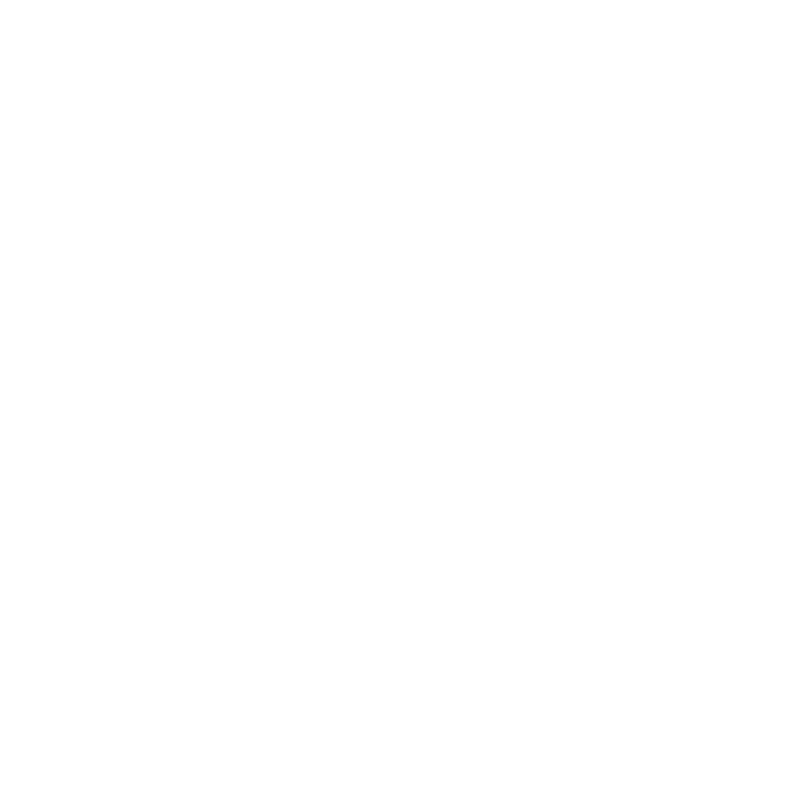

In [128]:

plt.figure(figsize=(10,10))
plot_tree(best_dtc,feature_names=fea_names,class_names=best_dtc.classes_,filled=True)
plt.show()

In [ ]:
best_dtc.feature_importances_

array([0.14272137, 0.        , 0.00097424, 0.        , 0.        ,
       0.        , 0.00253302, 0.        , 0.00506603, 0.        ,
       0.00155878, 0.07779808, 0.06886487, 0.69549391, 0.00161235,
       0.00337736, 0.        , 0.        , 0.        , 0.        ])

In [ ]:
imp_features_bymodel = pd.Series(best_dtc.feature_importances_,index=fea_names)
imp_features_bymodel.sort_values(ascending=False)

con__ram              0.695494
con__battery_power    0.142721
con__px_height        0.077798
con__px_width         0.068865
con__mobile_wt        0.005066
con__sc_w             0.003377
con__int_memory       0.002533
con__sc_h             0.001612
con__pc               0.001559
con__clock_speed      0.000974
con__n_cores          0.000000
con__blue             0.000000
con__m_dep            0.000000
con__four_g           0.000000
con__fc               0.000000
con__dual_sim         0.000000
con__talk_time        0.000000
con__three_g          0.000000
con__touch_screen     0.000000
con__wifi             0.000000
dtype: float64

<Axes: >

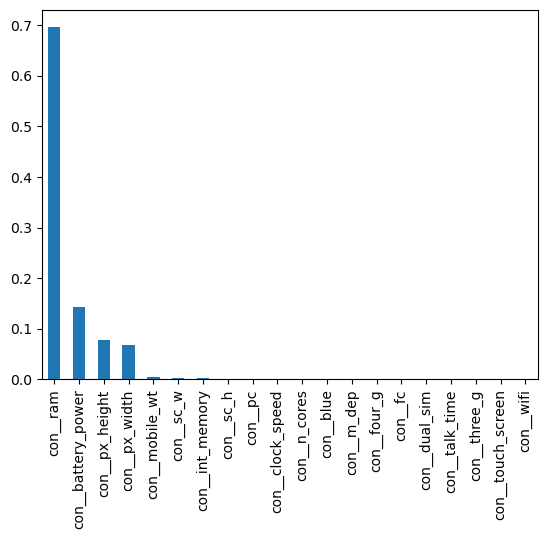

In [ ]:
imp_features_bymodel.sort_values(ascending=False).plot(kind='bar')

## 
Step 10: Out of Sample Predictions

In [ ]:

path2 = r'test.csv'
xnew = pd.read_csv(path2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:

pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 []),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['battery_power', 'blue', 'clock_speed',
                                  'dual_sim', 'fc', 'four_g', 'int_memory',
                                  'm_dep', 'mobile_wt', 'n_cores', 'pc',
                                  'px_height', 'px_width', 'ram', 'sc_h',
                                  'sc_w', 'talk_time', 'three_g',
                                  'touch_screen', 'wifi'])])

In [ ]:

xnew_pre = pre.transform(xnew)
xnew_pre.head()

,con__battery_power,con__blue,con__clock_speed,con__dual_sim,con__fc,con__four_g,con__int_memory,con__m_dep,con__mobile_wt,con__n_cores,con__pc,con__px_height,con__px_width,con__ram,con__sc_h,con__sc_w,con__talk_time,con__three_g,con__touch_screen,con__wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [ ]:

price_predicted = best_dtc.predict(xnew_pre)

In [ ]:
price_predicted[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0], dtype=int64)

In [ ]:
xnew['price_Predicted'] = price_predicted

In [ ]:

xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_Predicted
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


## Step11: Save the results to csv file

In [ ]:
xnew.to_csv('Price Results.csv',index=False)